# Review of the Solow model

The three basic equations: 

$$C_t+I_t=Y_t=F(K_t,L)  \rightarrow\text{   resouerce constraint}$$

$$I_t=K_{t+1}-(1-\delta)K_t \rightarrow\text{   capital accumulation}$$

$$I_t=sF(K_t,L) \rightarrow\text{   behavioral equation}$$


The law of motion equation for capital: 

$$K_{t+1} = (1-\delta)K_t + sF(K_t,L)$$

Using $k_t:=\frac{K_t}{L}$, $k_{t+1}:=\frac{K_{t+1}}{L}$, then 

$$k_{t+1} = (1-\delta)k_t + sF(k_t,1)$$


The steady state is a fixed point of the mapping g: $k_{t+1}=g(k_t)$. 
$$k^{*} = (1-\delta)k^{*} + sF(k^{*},1)$$

$$k^{*}=\frac{sA}{\delta}(k^{*})$$


Now, we can solve the model in Julia for a Cobb-Douglas ($F(K_t,L)=AK_t^\alpha L^{1-\alpha}$). We are going to use the `Plots` and `Parameters` packages, to plot and store the model parameters. Then we will define three functions:
$$k^{*}=\frac{sA}{\delta}(k^{*})^{\alpha}$$
$$(k^{*})^{1-\alpha}=\frac{sA}{\delta}$$
$$k^{*}=\left(\frac{sA}{\delta}\right)^{1/1-\alpha}$$


1. `params()`: stores all the parameters, grids, and values that will be fixed in the model.
2. `g(p,k)`: given some parameters p and a value of k, it gives us the value of k in the next period.
3. `kstar(p)`: given the parameters, it gives us the optimal value of the capital.

In [1]:
using Plots, Parameters

function params(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=3.0, N=10_000,
                  g=0.01, )
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g)
end


function g(p, k)
    @unpack A, s, α, δ = p
    return (1 - δ)*k+ A * s * k.^α 
end

function kstar(p)
    @unpack s, A, δ, α = p
    return ((s * A) / δ)^(1/(1 - α))
end

kstar (generic function with 1 method)

We can run the functions, and then plot.

In [2]:
p = params();
kgrid = p.kgrid;

In [3]:
g_values = g(p, kgrid);

In [4]:
ks = kstar(p)

1.7846741842265788

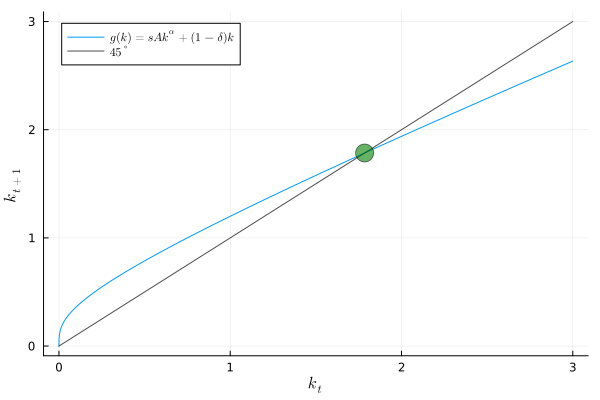

In [5]:
plot(kgrid, g_values, label="\$g(k) = sAk^{\\alpha} + (1 - \\delta)k\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid, kgrid, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks], [ks], color=:green, label="", ms=10, alpha=0.6)

Consider a production function $F(K_t,A_tL)$. With a productivity growth rate of g.This allows us some conveniences for the stationary model. Therefore, the capital motion law is:

$$K_{t+1}=(1-\delta)K_t + sF(K_t,A_tL)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $k_t:=\frac{K_t}{A_tL}$

$$\frac{A_{t+1}}{A_{t+1}} \frac{K_{t+1}}{A_t L} = (1-\delta)\frac{K_t}{A_t L} + s F(\frac{K_t}{A_tL},1)$$

$$(1+g)k_{t+1} = (1-\delta)k_t+sF(k_t,1)$$
$$k_{t+1} =\frac{ (1-\delta)k_t+sF(k_t,1)}{(1+g)}$$


## Exercises:

1. Show in a graph (using the format previously shown for functions and parameters), the difference when there is and is not productivity growth.
2. Show how it converges over time to the steady state in each case (with and without productivity growth) for 5 different values of $k_0$.

## Solution: Exercise 1

1. Suppose $A_t$ is productivity, so:
$$K_{t+1}=(1-\delta)K_t + sF(K_t,A_tL)$$

Using $\frac{A_{t+1}-A_t}{A_t}=g$ and $k_t:=\frac{K_t}{A_tL}$

$$\frac{A_{t+1}}{A_{t+1}} \frac{K_{t+1}}{A_t L} = (1-\delta)\frac{K_t}{A_t L} + s F(\frac{K_t}{A_tL},1)$$

$$(1+g)k_{t+1} = (1-\delta)k_t+sF(k_t,1)$$

where:
$$F(K_t,A_tL)=K_t^\alpha (A_tL)^{1-\alpha}$$

$$F\left(\frac{K_t}{A_tL},1\right)=\frac{K_t^\alpha (A_tL)^{1-\alpha}}{A_tL}$$
$$F\left(\frac{K_t}{A_tL},1\right)=\frac{K_t^\alpha (A_tL)^{1-\alpha}}{A_tL}$$
$$F\left(\frac{K_t}{A_tL},1\right)=\left(\frac{K_t}{A_tL}\right)^\alpha$$
which is equivalent to:
$$f\left(k_t\right)=\left(k_t\right)^\alpha$$
hence, the law of motion of per capita capital (in units of efficiency) is given by:
$$(1+g)k_{t+1} = (1-\delta)k_t+sF(k_t,1)$$
$$(1+g)k_{t+1} = (1-\delta)k_t+sf(k_t)$$
$$(1+g)k_{t+1} = (1-\delta)k_t+s\left(k_t\right)^\alpha$$
$$k_{t+1} =\frac{(1-\delta)k_t+s\left(k_t\right)^\alpha}{1+g}=g(k_t) $$

## Steady State
The previous equation can be solved for the SS:
$$(1+g)k = (1-\delta)k+s\left(k\right)^\alpha$$
$$(g+\delta)k = s\left(k\right)^\alpha$$
A solution to the previous equation is $k=0$
Another solution is:
$$(g+\delta)k = s\left(k\right)^\alpha$$


$$k^{1-\alpha}=\frac{s}{g+\delta}$$

$$k=\left(\frac{s}{g+\delta}\right)^{\frac{1}{1-\alpha}}$$

In [6]:
using Plots, Parameters

function params1(; A=2.0, s=0.3, α=0.3, δ=0.4, x0=0.25, kmin=0.0, kmax=1.75, N=10_000,
                  g=0.05, )
    kgrid = range(kmin, kmax, length=N)
    t = range(1,100, N)
    return (A=A, s=s, α=α, δ=δ, x0=x0, kmin=kmin, kmax=kmax, kgrid=kgrid, t=t, g=g)
end



function g1(p, k)
    @unpack A, s, α, δ,g = p
    return ((1 - δ)*k+ s * k.^α )/(1+g)
end

function kstar1(p)
    @unpack s, A, δ, α,g = p
    return (s/ (δ+g))^(1/(1 - α))
end

kstar1 (generic function with 1 method)

As before, we can run th functions and plot them for alternative values of coefficients

In [7]:
## Initial calibration g=0.05
p1 = params1()
kgrid1 = p1.kgrid
g1_values = g1(p1, kgrid1)
ks1 = kstar1(p1);

## Altertative calibration g=0.1
p2 = params1(g=0.10) # Notice how we keep all other coefficients, but only changing g
g2_values = g1(p2, kgrid1)
ks2 = kstar1(p2);

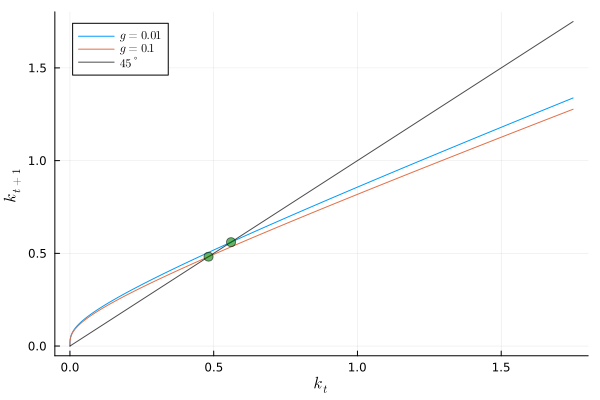

In [8]:
plot(kgrid1, g1_values, label="\$g=0.01\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid1, g2_values, label="\$g=0.1\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid1, kgrid1, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks1], [ks1], color=:green, label="", ms=5, alpha=0.6)
scatter!([ks2], [ks2], color=:green, label="", ms=5, alpha=0.6)

Now, we can also compare with respect to $g=0$ which is a baseline case w/o productivity growth

In [9]:
## Altertative calibration g=0
p3 = params1(g=-0.1) # Notice how we keep all other coefficients, but only changing g
g3_values = g1(p3, kgrid1)
ks3 = kstar1(p3);

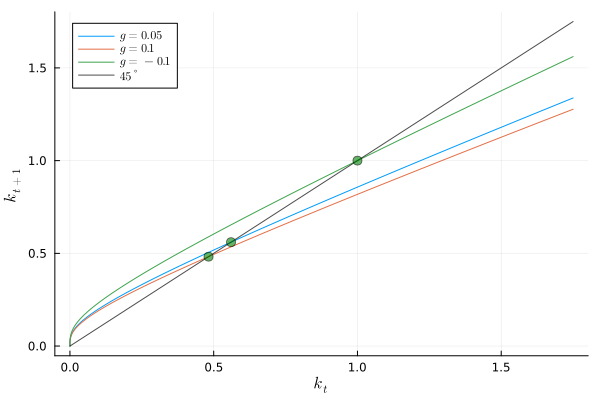

In [10]:
plot(kgrid1, g1_values, label="\$g=0.05\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid1, g2_values, label="\$g=0.1\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid1, g3_values, label="\$g=-0.1\$", xlabel="\$k_t\$",ylabel="\$k_{t+1}\$")
plot!(kgrid1, kgrid1, color=:black, label="\$45^\\circ\$", lw=1, alpha=0.7)
scatter!([ks1], [ks1], color=:green, label="", ms=5, alpha=0.6)
scatter!([ks2], [ks2], color=:green, label="", ms=5, alpha=0.6)
scatter!([ks3], [ks3], color=:green, label="", ms=5, alpha=0.6)

So, as long as labor augmenting productivity increases, the level of per capital capital, tends to decline. Why??

## Solution to Exercise 2


1. First: generalize the  g1(p, k) function, as g1_plot(g,p, k)


### 1. Redefine some functions

In [11]:
function g1_plot(g,p, k)
    @unpack s, α, δ= p
    return ((1 - δ)*k+ s * k.^α )/(1+g)
end

g1_plot (generic function with 1 method)

1.1 Sanity check: can generate $k*$ for different values of $g$

In [12]:
function kstar1_plot(g,p)
    @unpack s, A, δ, α= p
    return (s/ (δ+g))^(1/(1 - α))
end

kstar1_plot (generic function with 1 method)

How to test both? we now that g1_plot(g,p, k) at $k*$ should be equal to $k*$

In [13]:
growth=0.1
kstar1_plot(growth,p)

0.48202905286511644

In [14]:
g1_plot(growth,p, kstar1_plot(growth,p))

0.4820290528651164

1.2 Second: generate a function to compute $k_t$, given $g$, initial capital value, $k_0$ and length of $k$ vector (i.e. the $t$ dimension)

In [15]:
function simulate_k(g,k0, k_length)
    k=zeros(k_length,1)
    k0=k0
    k[1]=k0
    for t= 2:k_length
        k[t] = g1_plot(g,p,k[t-1])
    end
    return k
end

simulate_k (generic function with 1 method)

## 2 Use our functions
### 2.1 Different values of $g$, 0, 1\% and 10\% 

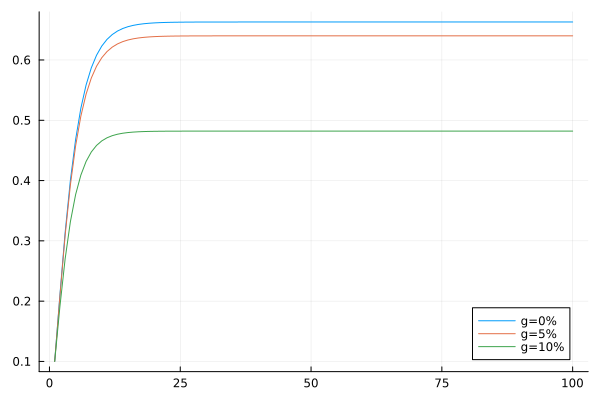

In [16]:
g_00=simulate_k(0.00,0.1,100);
g_01=simulate_k(0.01,0.1,100);
g_10=simulate_k(0.1,0.1,100);

plot(g_00,label="g=0%")
plot!(g_01,label="g=5%")
plot!(g_10,label="g=10%")



### 2.2 Sanity check
Now, in all three cases, convergence to the log run is $t=50$, we can do another sanity check:

$$k*=k_{50}$$
Let's check this:

In [17]:
g_00[50]

0.6630038320314386

In [18]:
kstar1_plot(0,p)

0.6630039114327095

In [19]:
g_01[50]


0.6400239768997456

In [20]:
kstar1_plot(0.01,p)

0.6400240340949171

In [21]:
g_10[50]


0.48202904923135154

In [22]:
kstar1_plot(0.1,p)

0.48202905286511644

## 2.3 Plot for a set of alternative innitial values of $k0$

In [23]:
function k_plot(g,p,k0_vec,t)
    kss=kstar1_plot(g,p)*ones(t,1)
    g_00_vec=Dict()
    pl=plot(kss,label="k*")
    for (i,k0) in enumerate(k0_vec)
        g_00_vec[i]=simulate_k(g,k0,t)
        pl=plot!(g_00_vec[i],label="k=$k0")
    end
    display(pl)
end

k_plot (generic function with 1 method)

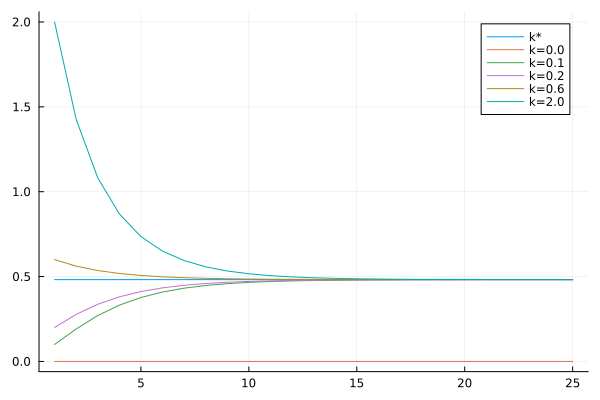

In [24]:
growth=0.1
t=25
k0_vec=[0.0,0.1,0.2,0.6,2]
k_plot(growth,p,k0_vec,t)